In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###### Data Wrangling

In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Data Pre-Processing: Label Encoder

In [ ]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(insurance_data['sex'])

LabelEncoder()

In [ ]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [ ]:
insurance_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
le.fit(insurance_data['smoker'])
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [ ]:
le.fit(insurance_data['region'])
insurance_data['region'] = le.transform(insurance_data['region'])

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##### EDA

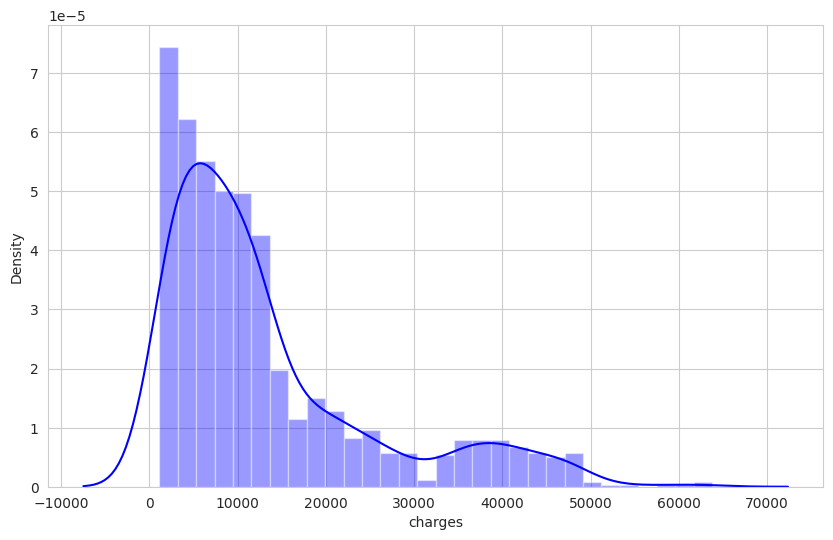

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(insurance_data['charges'], color = 'b')
plt.show()

<Axes: >

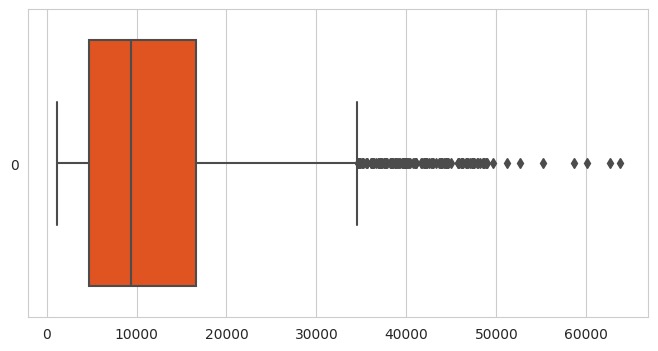

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(insurance_data['charges'], color = 'orangered', orient = 'h')

##### Handling Outliers

In [ ]:
from scipy.stats import zscore

In [ ]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [ ]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3].index

Int64Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [ ]:
insurance_data.drop([34, 543, 577, 819, 1146, 1230, 1300], inplace = True)

##### Correlation

<Axes: >

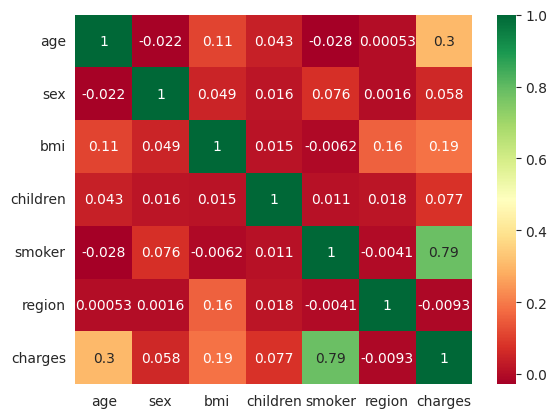

In [ ]:
sns.heatmap(insurance_data.corr(), annot = True, cmap='RdYlGn')

##### Split Data into Features & Target

In [ ]:
X = insurance_data.drop('charges', axis = 1)
Y = insurance_data['charges']

##### Split into Train & Test samples

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data into train & test i.e. 80% & 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

##### ANN Regression

In [ ]:
def build_model():
    model = Sequential()
    # units = num of neurons, input_shape = number of features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - For Regression
    model.add(Dense(units = 1))
    # Optimizers (alpha)
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compilers
    model.compile(loss = 'mean_squared_error',optimizer=optimizers, metrics=['mean_squared_error',
                                                                             'mean_absolute_error'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# epochs = num of iterations, batch_size = sample size per iteration,
# validation_split = 20% (model test size), validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,289815424.0,289815424.0,12219.415039,183550944.0,183550944.0,8864.198242
1,166025536.0,166025536.0,8411.217773,99764288.0,99764288.0,7708.867188
2,126877424.0,126877424.0,9056.295898,99343480.0,99343480.0,7533.392578
3,126405392.0,126405392.0,9059.736328,99405696.0,99405696.0,7251.810547
4,126731664.0,126731656.0,8931.100586,100426080.0,100426080.0,8255.082031
...,...,...,...,...,...,...
595,19566968.0,19566968.0,2622.771729,21774264.0,21774264.0,2963.835449
596,19651014.0,19651014.0,2596.731445,21761920.0,21761920.0,2109.958008
597,19407178.0,19407178.0,2579.315918,21428284.0,21428284.0,2117.850586
598,19392272.0,19392272.0,2524.029297,21322576.0,21322576.0,2359.643555


<Axes: >

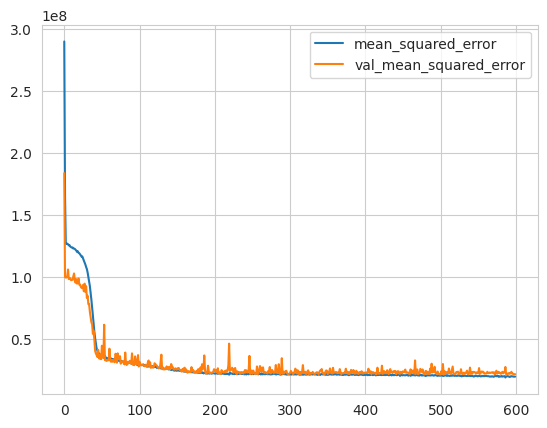

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [ ]:
# Yhat
predictions = model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
# 0-1
r2_score(y_test, predictions)

0.8602102645139681

In [ ]:
results = pd.DataFrame(predictions, columns = ['Predicted_Value'])

In [ ]:
results['Actual_Value'] = np.array(y_test)

<Axes: >

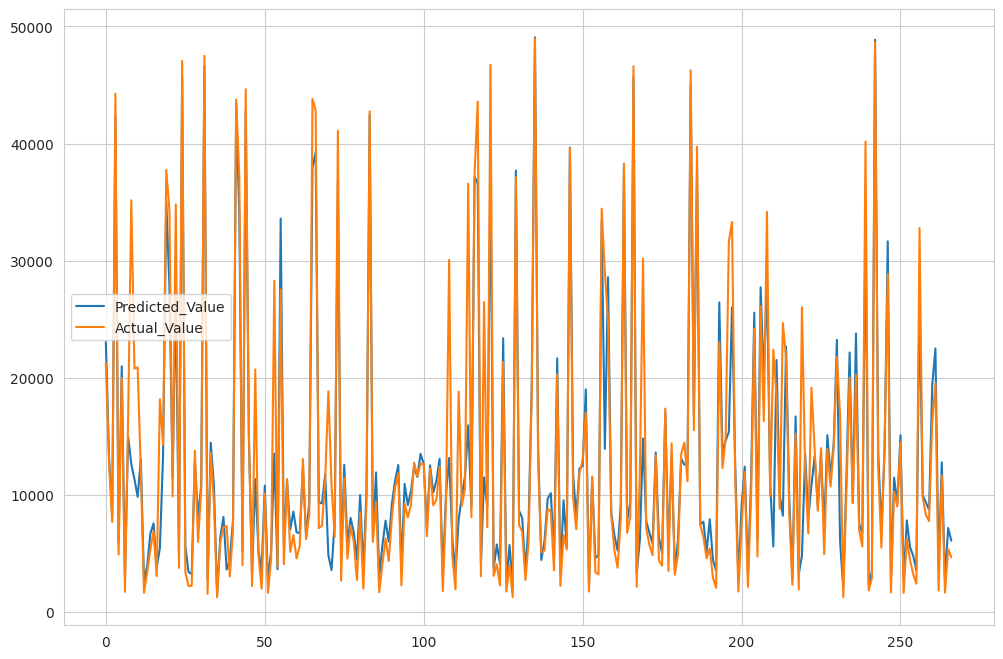

In [ ]:
results.plot(figsize=(12,8))